In [25]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

# Load data

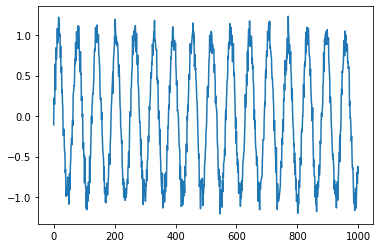

In [26]:
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1
plt.plot(series);

In [27]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  X.append(series[t:t + T])
  Y.append(series[t + T])

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = X.shape[0]

print(X.shape)

(990, 10, 1)


# Model

Epoch 1/80
16/16 [==============================] - 1s 21ms/step - loss: 0.4483 - val_loss: 0.2198
Epoch 2/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1834 - val_loss: 0.1481
Epoch 3/80
16/16 [==============================] - 0s 8ms/step - loss: 0.1154 - val_loss: 0.0803
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0614 - val_loss: 0.0462
Epoch 5/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0419 - val_loss: 0.0388
Epoch 6/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0360 - val_loss: 0.0336
Epoch 7/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0314 - val_loss: 0.0302
Epoch 8/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0284 - val_loss: 0.0274
Epoch 9/80
16/16 [==============================] - 0s 10ms/step - loss: 0.0258 - val_loss: 0.0249
Epoch 10/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0236 - val_loss: 0.0230
Epoch 11/80
16/16

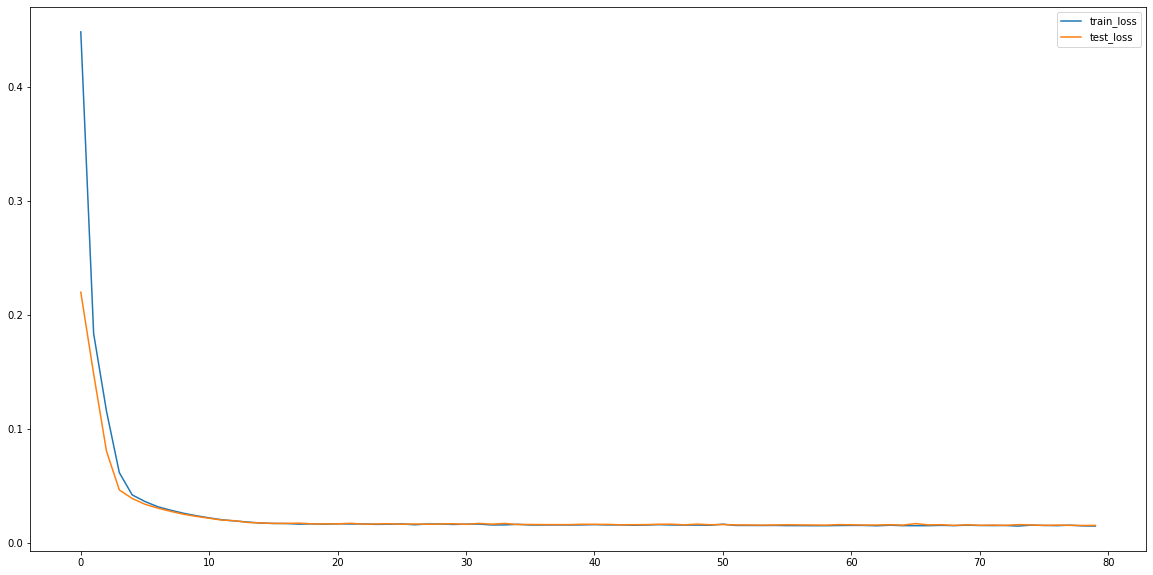

In [33]:
i = Input((T,D))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)

model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

idx = -N//2
history = model.fit(X[:idx], Y[:idx], epochs=80, validation_data=(X[idx:], Y[idx:]));

plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'], label='train_loss');
plt.plot(history.history['val_loss'], label='test_loss');
plt.legend();

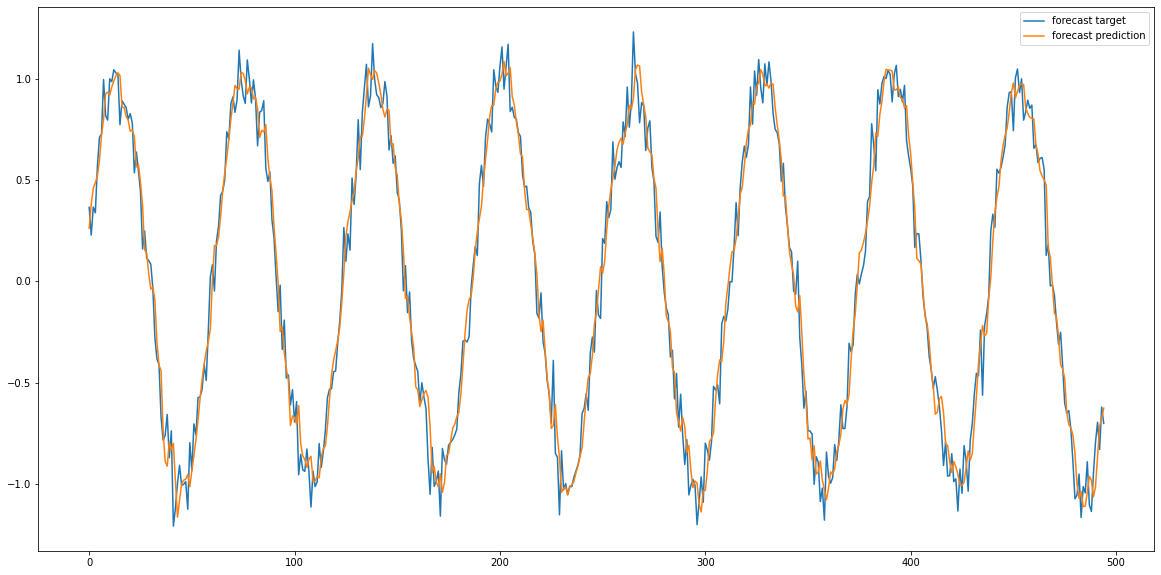

In [36]:
# one step predictions
Y1_hat = []
for x in X[idx:]:
  predictions = model.predict(x.reshape(1, T, D))
  Y1_hat.append(predictions[0])
Y1_hat = np.array(Y1_hat)

plt.figure(figsize=(20, 10))
plt.plot(Y[idx:], label='forecast target')
plt.plot(Y1_hat, label='forecast prediction')
plt.legend();

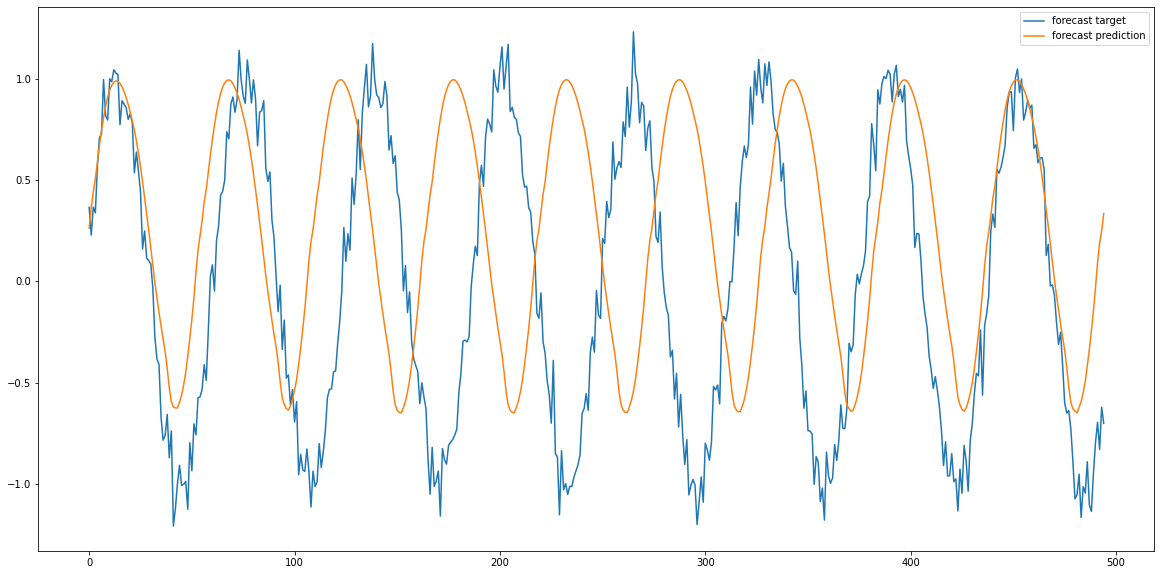

In [37]:
# future forecast predictions
Yn_hat = []
x = X[idx].copy()
for t in X[idx:]:
  predictions = model.predict(x.reshape(1, T, D))
  Yn_hat.append(predictions[0])
  x[:-1,:] = x[1:,:]
  x[-1,:] = predictions[0]
Yn_hat = np.array(Yn_hat)

plt.figure(figsize=(20, 10))
plt.plot(Y[idx:], label='forecast target')
plt.plot(Yn_hat, label='forecast prediction')
plt.legend();